In [ ]:
import pandas as pd
import copy
import numpy as np
import networkx as nx
#from netwulf import visualize
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/sample_data/musae_ES_target.csv")

In [ ]:
# Create the graph
G = nx.Graph()
columns = ['id', 'days', 'mature', 'views', 'partner', 'new_id']

for feature in columns:
    for index, utente in df[['id', feature]].iterrows():
        if pd.isna(utente.iloc[1]):
            continue
        # Check if the value is a string before attempting to split
        if isinstance(utente.iloc[1], str):
            link = utente.iloc[1].split(' ')
            for txt in link:
                if txt.isnumeric():
                    G.add_edge(utente.iloc[0], int(txt))
        # Handle case where the value is numeric
        elif isinstance(utente.iloc[1], (int, float)):
            G.add_edge(utente.iloc[0], int(utente.iloc[1]))

In [ ]:
print(f'Num nodes: {len(list(G.nodes))}')
print(f'Num edges: {len(list(G.edges))}')

Num nodes: 4650
Num edges: 6189


In [ ]:
sorted(list(nx.degree_centrality(G).items()), key=lambda x: x[1], reverse=True)

[(0, 0.9767691976769198),
 (1, 0.3544848354484836),
 (133928858, 0.00043020004302000433),
 (128745923, 0.00043020004302000433),
 (124660888, 0.00043020004302000433),
 (43162226, 0.00043020004302000433),
 (75126698, 0.00043020004302000433),
 (116726798, 0.00043020004302000433),
 (37329963, 0.00043020004302000433),
 (56530414, 0.00043020004302000433),
 (69551129, 0.00043020004302000433),
 (105370588, 0.00043020004302000433),
 (83646298, 0.00043020004302000433),
 (173882251, 0.00043020004302000433),
 (114882628, 0.00043020004302000433),
 (139545213, 0.00043020004302000433),
 (150370276, 0.00043020004302000433),
 (26150605, 0.00043020004302000433),
 (52292027, 0.00043020004302000433),
 (32682246, 0.00043020004302000433),
 (95338797, 0.00043020004302000433),
 (39137930, 0.00043020004302000433),
 (73819286, 0.00043020004302000433),
 (62009877, 0.00043020004302000433),
 (30089488, 0.00043020004302000433),
 (174800098, 0.00043020004302000433),
 (118999322, 0.00043020004302000433),
 (189272291,

In [ ]:
# Compute degree centrality to find influential nodes
degree_centrality = nx.degree_centrality(G)

# Sort by influence (degree centrality) and take top 50
top_50_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:50]
top_nodes = [node for node, centrality in top_50_nodes]

# Create a subgraph with only the top 50 nodes
G_sub = G.subgraph(top_nodes)

# Function to plot the graph
def plot_network(G):
    colors = [G[u][v].get('color', 'black') for u, v in G.edges()]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10), dpi=80)

    # Visualization 1
    pos_attrs1 = {}
    circPos1 = nx.shell_layout(G)
    for node, coords in circPos1.items():
        pos_attrs1[node] = (coords[0] + 0.01, coords[1] - 0.05)
    nx.draw_networkx_labels(G, pos=circPos1, ax=axes[0])
    nx.draw(G, pos=pos_attrs1, node_size=40, ax=axes[0], edge_color=colors)
    axes[0].set_title('Visualization1')

    # Visualization 2
    pos_attrs2 = {}
    circPos2 = nx.spring_layout(G, k=0.2, iterations=20)
    for node, coords in circPos2.items():
        pos_attrs2[node] = (coords[0] + 0.01, coords[1] - 0.05)
    nx.draw_networkx_labels(G, pos=circPos2, ax=axes[1])
    nx.draw(G, pos=pos_attrs2, node_size=40, ax=axes[1], edge_color=colors)
    axes[1].set_title('Visualization2')

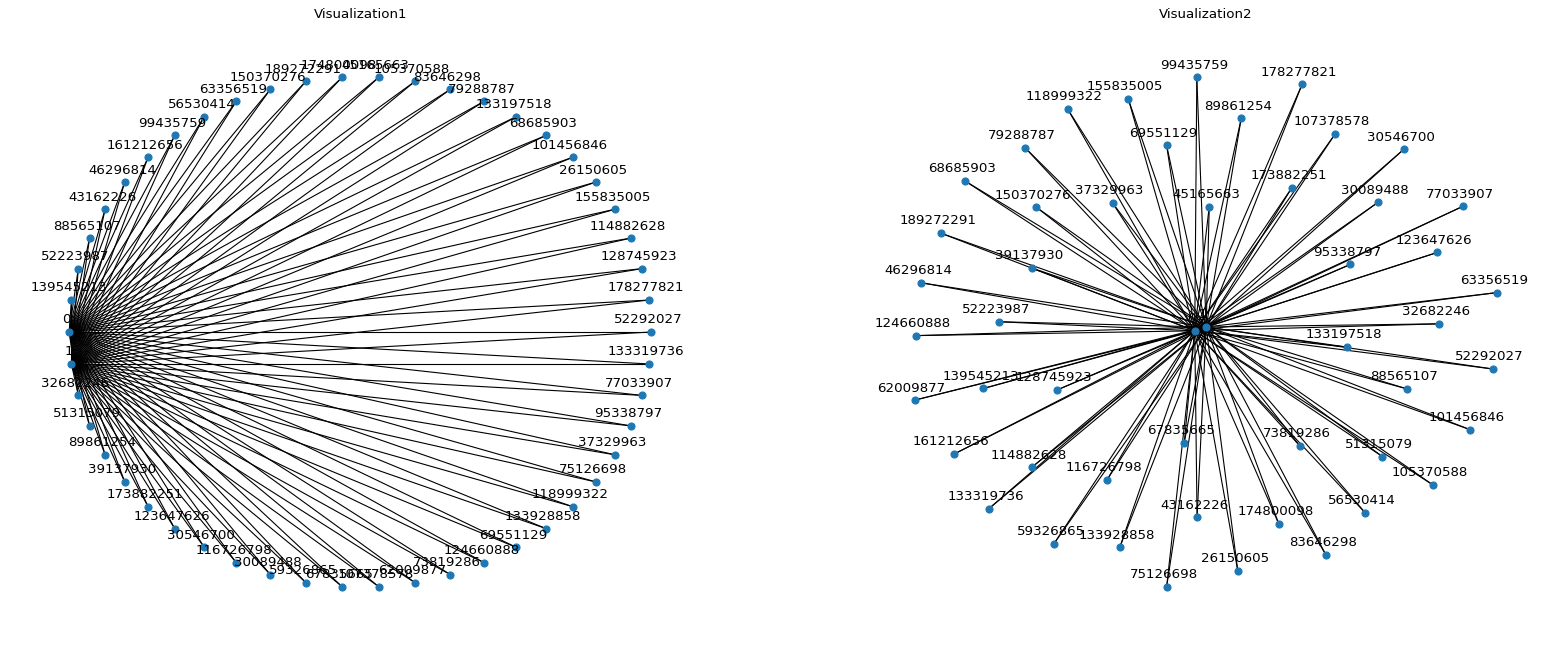

In [ ]:
# Plot the subgraph of the top 50 most influential nodes
plot_network(G_sub)
plt.show()

In [ ]:
!pip install networkx matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [ ]:
def common_neighbors(G):
    preds = list(nx.common_neighbor_centrality(G))
    # Convert to adjacency matrix format
    adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
    return adj_matrix

In [ ]:
def adamic_adar(G):
    preds = list(nx.adamic_adar_index(G, [(u, v) for u in G.nodes() for v in G.nodes() if u < v]))
    adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
    for u, v, p in preds:
        adj_matrix[u][v] = p
        adj_matrix[v][u] = p
    return adj_matrix

In [ ]:
def jaccard(G):
    preds = list(nx.jaccard_coefficient(G, [(u, v) for u in G.nodes() for v in G.nodes() if u < v]))
    adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
    for u, v, p in preds:
        adj_matrix[u][v] = p
        adj_matrix[v][u] = p
    return adj_matrix

In [ ]:
def node_clustering(G):
    preds = list(nx.preferential_attachment(G, [(u, v) for u in G.nodes() for v in G.nodes() if u < v]))
    adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
    for u, v, p in preds:
        adj_matrix[u][v] = p
        adj_matrix[v][u] = p
    return adj_matrix

In [ ]:
def katz_index(G, alpha=0.1):
    katz = nx.katz_centrality_numpy(G, alpha=alpha)
    # Convert to adjacency matrix
    adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
    # Example: Multiply katz centrality for demonstration
    for i, node_i in enumerate(sorted(G.nodes())):
        for j, node_j in enumerate(sorted(G.nodes())):
            adj_matrix[i][j] = katz[node_i] * katz[node_j]
    return adj_matrix

In [ ]:
def link_prediction_rwr(G, alpha=0.85, max_iter=100, tol=1e-6):
    # Initialize
    nodes = sorted(G.nodes())
    n = len(nodes)
    node_index = {node: i for i, node in enumerate(nodes)}
    adj = nx.to_numpy_array(G, nodelist=nodes)
    degree = adj.sum(axis=1)
    P = adj / degree[:, None]
    r = np.zeros(n)
    r[0] = 1  # Starting from the first node for example
    for _ in range(max_iter):
        r_new = alpha * P.T @ r + (1 - alpha)
        if np.linalg.norm(r_new - r) < tol:
            break
        r = r_new
    # Convert to adjacency matrix
    adj_matrix = r.reshape(-1, 1) @ r.reshape(1, -1)
    return adj_matrix

In [ ]:
def sim_rank(G, decay=0.8, max_iter=100, tol=1e-4):
    nodes = sorted(G.nodes())
    n = len(nodes)
    sim = np.identity(n)
    for _ in range(max_iter):
        sim_old = sim.copy()
        for i in range(n):
            for j in range(n):
                if i != j:
                    neighbors_i = set(G.neighbors(nodes[i]))
                    neighbors_j = set(G.neighbors(nodes[j]))
                    if not neighbors_i or not neighbors_j:
                        sim[i][j] = 0
                    else:
                        sim[i][j] = (decay / (len(neighbors_i) * len(neighbors_j))) * \
                                    sum(sim_old[sorted(nodes).index(u)][sorted(nodes).index(v)] for u in neighbors_i for v in neighbors_j)
        if np.linalg.norm(sim - sim_old) < tol:
            break
    return sim

In [ ]:
def path_of_length_three(G):
    adj = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
    path_length_three = np.linalg.matrix_power(adj, 3)
    return path_length_three

In [ ]:
def local_path_index(G, alpha=0.1, path_length=5):
    adj = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
    local_path = np.zeros_like(adj)
    for l in range(1, path_length + 1):
        local_path += (alpha ** l) * np.linalg.matrix_power(adj, l)
    return local_path

In [ ]:
import numpy as np

def stochastic_block_model(G, num_blocks):
    """
    Generate a stochastic block model for the given graph.
    Ensures symmetric probabilities between blocks with debug output.

    Parameters:
        G: Original graph (ignored in this stub but retained for consistency).
        num_blocks: Number of blocks to divide nodes into.

    Returns:
        Adjacency matrix representing predicted links.
    """
    from networkx.generators.community import stochastic_block_model as nx_sbm

    # Number of nodes in the graph
    num_nodes = len(G.nodes)

    # Assign nodes to blocks randomly
    block_sizes = [num_nodes // num_blocks] * num_blocks
    for i in range(num_nodes % num_blocks):
        block_sizes[i] += 1  # Distribute remaining nodes

    # Define symmetric inter-block probabilities
    probs = np.random.uniform(0.1, 0.5, size=(num_blocks, num_blocks))
    probs = (probs + probs.T) / 2  # Make symmetric

    # Ensure diagonal elements are within the range [0, 1]
    np.fill_diagonal(probs, np.clip(np.diag(probs), 0.1, 0.9))

    # Debug: Print the probs matrix to confirm symmetry
    print("Symmetric Probability Matrix (probs):")
    print(probs)

    # Generate the stochastic block model graph
    sbm_graph = nx_sbm(block_sizes, probs.tolist())

    # Create adjacency matrix for the predicted graph
    adj_matrix = nx.to_numpy_array(sbm_graph)

    return adj_matrix

In [ ]:
def path_entropy(G):
    # Example implementation: Entropy based on path lengths
    from scipy.stats import entropy
    path_lengths = dict(nx.all_pairs_shortest_path_length(G))
    entropies = {}
    for node, lengths in path_lengths.items():
        length_counts = {}
        for target, length in lengths.items():
            length_counts[length] = length_counts.get(length, 0) + 1
        lengths_prob = [count / sum(length_counts.values()) for count in length_counts.values()]
        entropies[node] = entropy(lengths_prob)
    # Convert to adjacency matrix (average entropy)
    avg_entropy = np.mean(list(entropies.values()))
    adj_matrix = np.full((len(G), len(G)), avg_entropy)
    return adj_matrix

In [ ]:
def nodes_to_indexes(G):
    return {node: idx for idx, node in enumerate(sorted(G.nodes()))}

In [ ]:
def get_top_predicted_link(adj_matrix, num_nodes, pct_new_link, name_index_map):
    # Flatten the matrix and sort
    sorted_indices = np.argsort(adj_matrix, axis=None)[::-1]
    links = []
    for idx in sorted_indices:
        i, j = divmod(idx, num_nodes)
        if i < j:  # Avoid duplicates and self-loops
            links.append((name_index_map[i][0], name_index_map[j][0]))
    # Select top pct_new_link percentage
    top_k = int(len(links) * (pct_new_link / 100))
    return links[:top_k]

In [ ]:
def plot_network(G, new_links=None, color='r'):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, node_size=300)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    if new_links:
        nx.draw_networkx_edges(G, pos, edgelist=new_links, edge_color=color, width=2)
    plt.axis('off')
    plt.show()

In [ ]:
# Example Graph (Replace this with your actual graph)
G = nx.karate_club_graph()

# Utility mappings
name_index_map = list(nodes_to_indexes(G).items())

# Compute similarity matrices
predicted_adj_matrix_common_neighbors = common_neighbors(G)
predicted_adj_matrix_adamic_adar = adamic_adar(G)
predicted_adj_matrix_jaccard = jaccard(G)
predicted_adj_matrix_node_clustering = node_clustering(G)
predicted_adj_matrix_katz_index = katz_index(G, 0.1)
predicted_adj_matrix_sim_rank = sim_rank(G)
predicted_adj_matrix_path_of_length_three = path_of_length_three(G)
predicted_adj_matrix_local_path_index = local_path_index(G, 0.1, 5)
predicted_adj_matrix_stochastic_block_model = stochastic_block_model(G, 2)
predicted_adj_matrix_path_entropy = path_entropy(G)

# Group similarity results
local_similarity_results = [
    predicted_adj_matrix_common_neighbors,
    predicted_adj_matrix_adamic_adar,
    predicted_adj_matrix_jaccard,
    predicted_adj_matrix_node_clustering
]

global_similarity_results = [
    predicted_adj_matrix_katz_index,
    predicted_adj_matrix_sim_rank
]

quasi_local_similarity_results = [
    predicted_adj_matrix_path_of_length_three,
    predicted_adj_matrix_local_path_index
]

# Define a function to get new links
def get_new_links(methods_prediction, name_index_map, G, pct, stats=False):
    new_link_set = set()
    total_link = []
    for method in methods_prediction:
        tmp = get_top_predicted_link(method, G.number_of_nodes(), pct, name_index_map)
        total_link.append(len(tmp))
        for link in tmp:
            new_link_set.add(link)
    if stats:
        print(f'Number of new link for each method: {total_link}, total sum: {sum(total_link)}')
        print(f'Single new link list: {new_link_set}, total new single link: {len(new_link_set)}')
    return new_link_set

Symmetric Probability Matrix (probs):
[[0.39845292 0.33466604]
 [0.33466604 0.35240495]]


In [ ]:
# Get new links based on similarity measures
print('\nLocal Similarity Results')
new_link_set_local = get_new_links(local_similarity_results, name_index_map, G, 5, stats=True)

print('\nGlobal Similarity Results')
new_link_set_global = get_new_links(global_similarity_results, name_index_map, G, 1, stats=True)

print('\nQuasi Local Similarity Results')
new_link_set_quasi_local = get_new_links(quasi_local_similarity_results, name_index_map, G, 3, stats=True)


Local Similarity Results
Number of new link for each method: [28, 28, 28, 28], total sum: 112
Single new link list: {(7, 17), (13, 33), (29, 32), (5, 10), (3, 13), (20, 29), (23, 25), (0, 5), (14, 22), (17, 21), (0, 23), (1, 33), (2, 32), (20, 22), (14, 15), (23, 27), (3, 33), (9, 28), (1, 8), (13, 19), (8, 32), (7, 12), (25, 27), (18, 30), (31, 33), (22, 30), (23, 29), (15, 18), (0, 2), (23, 31), (1, 3), (0, 32), (25, 31), (3, 12), (23, 24), (23, 33), (27, 33), (1, 32), (2, 31), (29, 33), (20, 30), (14, 32), (1, 7), (2, 33), (3, 7), (6, 33), (31, 32), (20, 32), (2, 8), (8, 33), (30, 33), (15, 20), (26, 29), (5, 6), (14, 18), (1, 2), (0, 4), (0, 13), (0, 31), (6, 10), (15, 22), (0, 6), (2, 3), (1, 13), (3, 32), (9, 27), (0, 33), (2, 30), (18, 20), (15, 33), (18, 29), (22, 29), (0, 8), (19, 21), (32, 33), (7, 13), (4, 5), (18, 22), (0, 1), (0, 10), (2, 7), (5, 33), (7, 33), (0, 3), (14, 20), (17, 19), (23, 32)}, total new single link: 87

Global Similarity Results
Number of new link fo

In [ ]:
def get_G_new(G, new_links, color='r'):
    """
    Return a new Graph with new links added.

    Parameters:
        G: Original graph.
        new_links: Set of new links (tuples).
        color: Color to assign to the new edges.

    Returns:
        G_new: A copy of the graph with new links added.
    """
    G_new = copy.deepcopy(G)

    for edge in new_links:
        G_new.add_edge(edge[0], edge[1], color=color)

    return G_new

Graph with new links from Local Similarity methods:


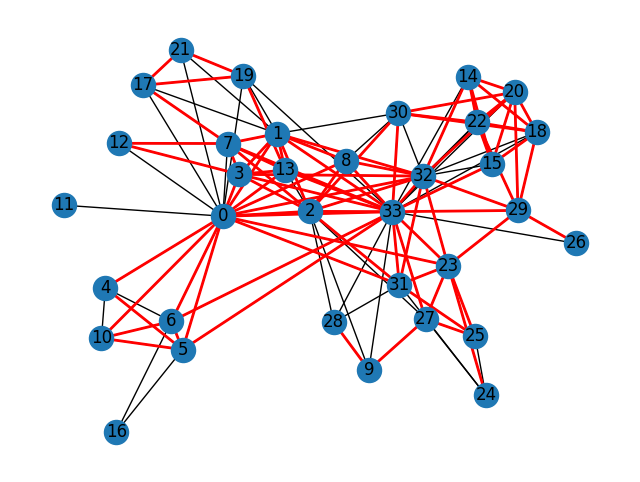

Graph with new links from Global Similarity methods:


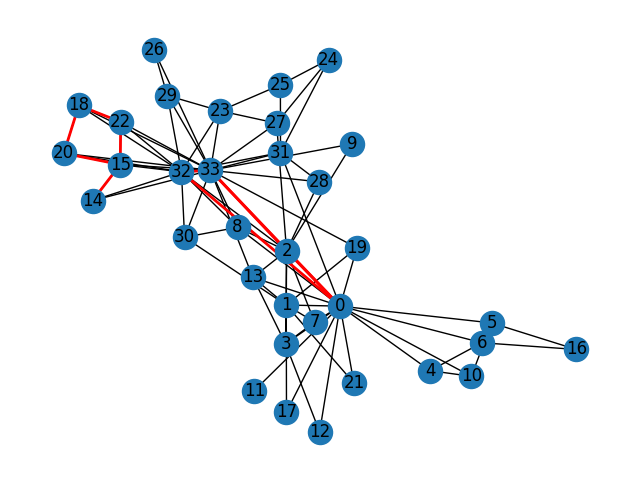

Graph with new links from Quasi Local Similarity methods:


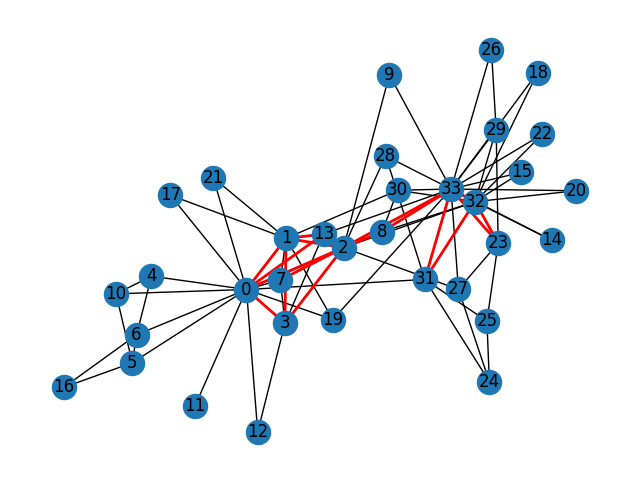

Graph with new links that are common across all similarity methods:


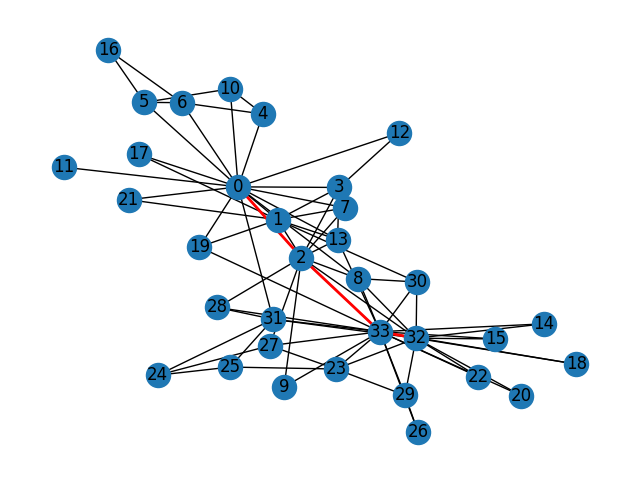

Graph with new links predicted by Stochastic Block Model:


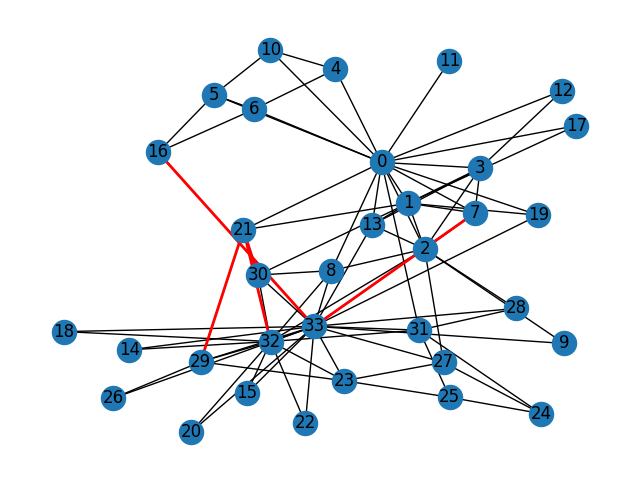

Graph with new links predicted by Path Entropy method:


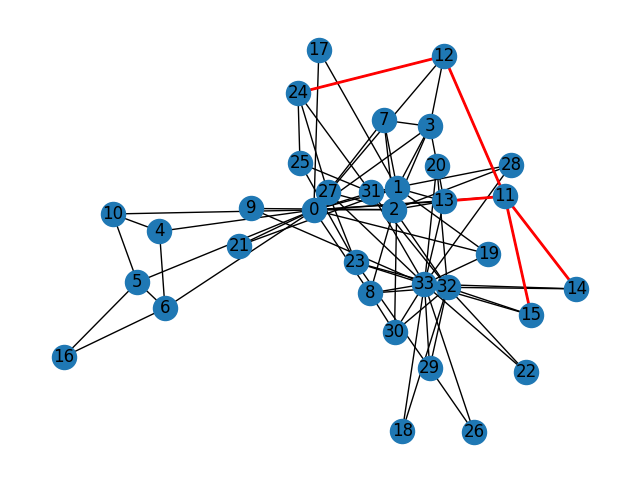

In [ ]:
# Plot networks with new links
print("Graph with new links from Local Similarity methods:")
G_new = get_G_new(G, new_link_set_local, 'r')
plot_network(G_new, new_link_set_local, 'r')

print("Graph with new links from Global Similarity methods:")
G_new = get_G_new(G, new_link_set_global, 'r')
plot_network(G_new, new_link_set_global, 'r')

print("Graph with new links from Quasi Local Similarity methods:")
G_new = get_G_new(G, new_link_set_quasi_local, 'r')
plot_network(G_new, new_link_set_quasi_local, 'r')

# Intersection of all similarity methods
print("Graph with new links that are common across all similarity methods:")
all_similarity = set()
link_intersection = set()
tmp = [new_link_set_global, new_link_set_local, new_link_set_quasi_local]
for pred in tmp:
    all_similarity.update(pred)

link_intersection = new_link_set_global & new_link_set_local & new_link_set_quasi_local
G_new = get_G_new(G, link_intersection, 'r')
plot_network(G_new, link_intersection, 'r')

# Additional predictions
print("Graph with new links predicted by Stochastic Block Model:")
new_links = get_top_predicted_link(predicted_adj_matrix_stochastic_block_model, G.number_of_nodes(), pct_new_link=1, name_index_map=name_index_map)
G_new = get_G_new(G, new_links, 'r')
plot_network(G_new, new_links, 'r')

print("Graph with new links predicted by Path Entropy method:")
new_links = get_top_predicted_link(predicted_adj_matrix_path_entropy, G.number_of_nodes(), 1, name_index_map=name_index_map)
G_new = get_G_new(G, new_links, 'r')
plot_network(G_new, new_links, 'r')